<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/Face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [41]:
## tạo dữ liệu để train
folder = '/content/drive/MyDrive/MyPicture/face_data/'
photos_train, labels_train = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Ha'):
    output=1.0
  if file.startswith('hau'):
    output=2.0
  if file.startswith('minh'):
    output=3.0
  photo = load_img(folder + file, target_size = (30,40))
  photo = img_to_array(photo)
  photos_train.append(photo)
  labels_train.append(output)
photos_train = asarray(photos_train)
labels_train = asarray(labels_train)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/MyPicture/face_data/Ha_Hau_Minh_photos.npy',photos_train)
save('/content/drive/MyDrive/MyPicture/face_data/Ha_Hau_Minh_labels.npy',labels_train)

(180, 30, 40, 3) (180,)


In [42]:
folder_test = '/content/drive/MyDrive/MyPicture/face_data_test/'
photos_test, labels_test = list(), list()
for file in listdir(folder_test) :
  output = 0.0
  if file.startswith('Ha'):
    output=1.0
  if file.startswith('hau'):
    output=2.0
  if file.startswith('minh'):
    output=3.0
  photo_t = load_img(folder_test + file, target_size = (30,40))
  photo_t = img_to_array(photo_t)
  photos_test.append(photo_t)
  labels_test.append(output)
photos_test = asarray(photos_test)
labels_test = asarray(labels_test)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/MyPicture/face_data_test/Ha_Hau_Minh_photos.npy',photos_test)
save('/content/drive/MyDrive/MyPicture/face_data_test/Ha_Hau_Minh_labels.npy',labels_test)

(30, 30, 40, 3) (30,)


In [43]:
photos_train = photos_train.astype('float')/255.0
photos_test = photos_test.astype('float')/255.0


In [44]:
from keras.utils import to_categorical

labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

print(labels_train.shape)
print(labels_test.shape)

(180, 4)
(30, 4)


In [51]:
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Normalization, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import LeakyReLU


############## 
batch_size=64
epochs =20
classes =4

In [52]:

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(30,40,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

In [53]:
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation='softmax'))

In [54]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

In [55]:
train = model.fit(photos_train, labels_train, batch_size, epochs=epochs, verbose=1)

Epoch 1/20
3/3 [==============================] - 8s 113ms/step - loss: 1.2494 - accuracy: 0.3278
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 0.7883 - accuracy: 0.7444
Epoch 3/20
3/3 [==============================] - 0s 8ms/step - loss: 0.3214 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 0.0607 - accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 9ms/step - loss: 4.8239e-04 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 3.1680e-04 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 8ms/step - loss: 3.0669e-04 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 8ms/step - loss: 1.2981e-04 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 8ms/step - loss: 2.7943e-05 - accuracy: 1.0000
Epoch 11/20
3/3

<ipython-input-56-e3c66b1c690e>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


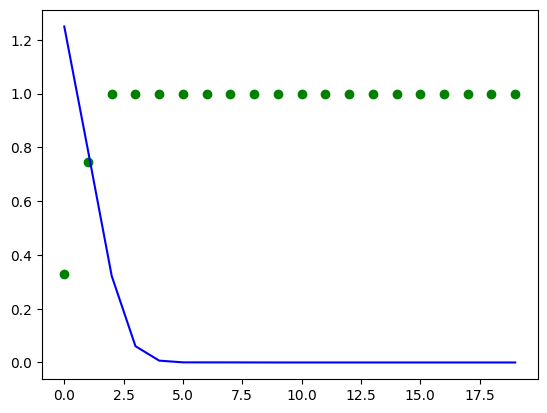

In [56]:
model.save('/content/drive/MyDrive/MyPicture/CNN/model_face.h5')
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 17ms/step
Predicted:  ha


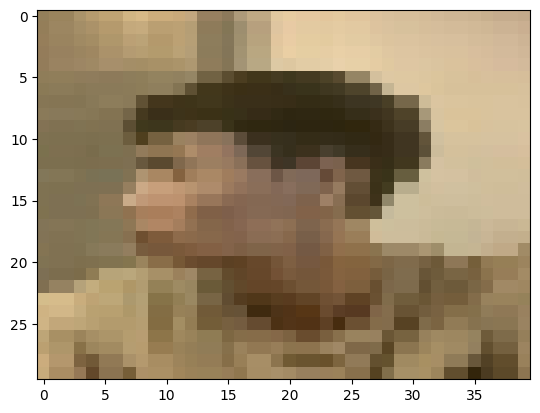

In [66]:
name={1:'ha', 2:'hau',3:'minh'}
#test
import numpy as np
filePath = '/content/drive/MyDrive/MyPicture/face_data_test/Ha1.jpg'
testImage = load_img(filePath, target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)
